# **BINOMIAL PRICING MODEL - AMEICAN OPTIONS**

In [9]:
#installing library
!pip install yfinance

**IMPORTING THE LIBRARIES**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [11]:
symbol = 'SPY'
end = date.today()
start = end.replace(year = 2023)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(start=start, end=end)


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-16 00:00:00-05:00,603.967249,605.741308,603.179921,604.754578,43695200,0.000,0.0,0.0
2024-12-17 00:00:00-05:00,602.163299,603.139992,600.867672,602.262939,55773500,0.000,0.0,0.0
2024-12-18 00:00:00-05:00,601.953994,604.375836,583.924709,584.313416,108248700,0.000,0.0,0.0
2024-12-19 00:00:00-05:00,589.376338,591.010851,583.884811,584.133972,85919500,0.000,0.0,0.0
2024-12-20 00:00:00-05:00,581.770020,595.750000,580.909973,591.150024,125535900,1.966,0.0,0.0


In [12]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-12-22 00:00:00-05:00,467.858638,469.359407,465.726021,467.651306,67126600,0.0,0.0,0.0
2023-12-26 00:00:00-05:00,468.066000,470.544191,467.986997,469.625977,55387000,0.0,0.0,0.0
2023-12-27 00:00:00-05:00,469.418611,470.623161,468.875589,470.475067,68000300,0.0,0.0,0.0
2023-12-28 00:00:00-05:00,470.840367,471.501865,470.228224,470.652771,77158100,0.0,0.0,0.0
2023-12-29 00:00:00-05:00,470.455301,470.988470,467.305699,469.290253,122234100,0.0,0.0,0.0


In [13]:
symbol = 'SPY'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [14]:
dfo.options  #to get the date of different expiration time

('2024-12-23',
 '2024-12-24',
 '2024-12-26',
 '2024-12-27',
 '2024-12-31',
 '2025-01-03',
 '2025-01-10',
 '2025-01-17',
 '2025-01-24',
 '2025-01-31',
 '2025-02-21',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-12-19',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15')

In [15]:
dfo_exp = dfo.option_chain(dfo.options[5])  #you can change index to try on different expiry dates

In [16]:
dfo_exp.calls.tail() #Data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
91,SPY250103C00680000,2024-12-19 16:53:30+00:00,680.0,0.02,0.0,0.01,0.0,0.0,2.0,146,0.246101,False,REGULAR,USD
92,SPY250103C00685000,2024-12-19 16:03:27+00:00,685.0,0.01,0.0,0.01,0.0,0.0,400.0,385,0.257820,False,REGULAR,USD
93,SPY250103C00690000,2024-12-19 20:44:57+00:00,690.0,0.01,0.0,0.01,0.0,0.0,32.0,7,0.265632,False,REGULAR,USD
94,SPY250103C00695000,2024-12-13 20:25:57+00:00,695.0,0.01,0.0,0.01,0.0,0.0,100.0,101,0.281257,False,REGULAR,USD
95,SPY250103C00700000,2024-12-19 18:24:31+00:00,700.0,0.01,0.0,0.01,0.0,0.0,272.0,747,0.289070,False,REGULAR,USD


# **Calculation of u and d**

u =size of the up move factor=
 e^{σ\sqrt{t}}, and

d =size of the down move factor=
 = e^{−σ\sqrt{t}}
 = 1/ u

σ is the annual volatility of the underlying asset’s returns and t is the length of the step in the binomial model.

To calculate annual volatility:-

First calculate the daily returns of the asset

Then calculate its standard deviation

Then multiply it by sqrt(252) as in a year there are 252 trading days.



In [17]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df['Close']/df['Close'].shift(1))
    log_return = log_return.dropna()
    daily_vol = log_return.std()
    vol = daily_vol*np.sqrt(252)

    return vol

In [18]:
vol = annual_vol(df)
vol

0.12470561242391687

In [19]:
dfo.options[5]

'2025-01-03'

In [20]:
date.today()

datetime.date(2024, 12, 22)

In [21]:
N = 100          #Number of steps
T =12/365      #Calculate the number of days left for expiry from your calculation in years, change accordingly
t = T/N

In [22]:
u = np.exp(vol/np.sqrt(t))   #Calculate u from the above formula
u

970.370074311634

In [23]:
d = 1/u   #Similarly calculate d
d

0.0010305346655598226

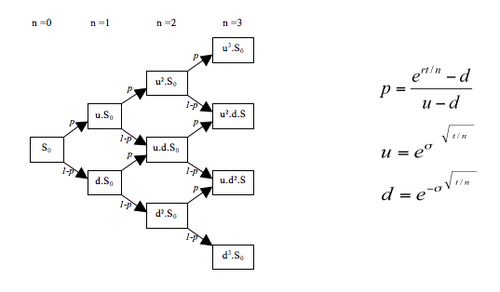

In [24]:
def first_binomial_american(S, K, T, r, u, d, N, option_type):
    """
    Implementation of binomial pricing model for American options.

    Parameters
    ----------
    S : float
        Stock price
    K : float
        Strike price
    T : float
        Expiry time in years
    r : float
        Risk-free rate (annualized, continuous compounding)
    u : float
        Size of up move factor
    d : float
        Size of down move factor
    N : int
        Number of steps in the binomial model
    option_type : char
        'C' for Call, 'P' for Put

    Returns
    -------
    price : float
        Returns the price of the option
    """
    t = T / N
    q = (np.exp(r*t) - d) / (u - d)
    bin_tree = np.zeros((N+1,N+1))
    bin_tree[0,0] = S
    for i in range(1, N+1):
        for j in range(i+1):
          bin_tree[i,j]= S*(u*(i-j))*(d**j)

    option_tree = np.zeros((N + 1, N + 1))

    for j in range(N+1):
        if option_type == 'C':
          option_tree[N, j] = max(0, bin_tree[N, j] - K)
        elif option_type == 'P':
          option_tree[N, j] = max(0, K - bin_tree[N, j])

    for i in range(N-1, -1, -1):
        for j in range(i+1):
            option_tree[i, j] = np.exp(-r*t)*(q*option_tree[i+1, j+1] + (1-q)*option_tree[i+1, j])
            if option_type == 'C':
              option_tree[i, j] = max(option_tree[i, j], bin_tree[i, j] - K)
            elif option_type == 'P':
              option_tree[i, j] = max(option_tree[i, j], K - bin_tree[i, j])

    return option_tree[0,0]







In [25]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated by n step binomial model
call = {}
for K in dfo_exp.calls['strike']:
    call[K] = first_binomial_american(
        S=df['Close'].iloc[-1],
        K=K,
        T=T,
        r=0.01*t,
        u=u,
        d=d,
        N=N,
        option_type='C'
    )

th_call = pd.DataFrame.from_dict(call, orient='index', columns=['th_call'])
th_call.head()

,th_call
440.0,5.175407e+07
450.0,5.175406e+07
460.0,5.175405e+07
465.0,5.175405e+07
470.0,5.175404e+07


In [26]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
440.0,160.19
450.0,138.21
460.0,127.99
465.0,139.50
470.0,134.50


In [27]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
440.0,5.175407e+07,160.19
450.0,5.175406e+07,138.21
460.0,5.175405e+07,127.99
465.0,5.175405e+07,139.50
470.0,5.175404e+07,134.50
475.0,5.175404e+07,129.40
480.0,5.175403e+07,114.15
485.0,5.175403e+07,122.11
500.0,5.175401e+07,93.76
505.0,5.175401e+07,85.65


<Axes: >

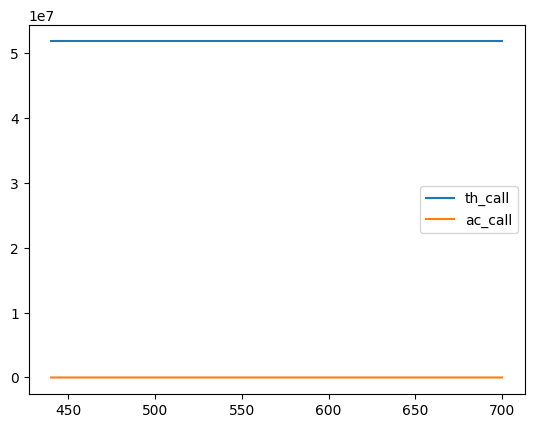

In [28]:
call.plot() #plotting the actual and theoretical option prices

In [29]:
#r is the risk free rate taken from the 10 years us treasury bond
#put price calculated by n step binomial model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = first_binomial_american(
        S=df['Close'][len(df)-1],
        K=K,
        T=T,
        r=0.01 * t,
        u=u,
        d=d,
        N=N,
        option_type='P'
    )
    put[K] = put_price

th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns={0: "th_put"}, inplace=True)
th_put.head()

,th_put
300.0,1.560100
310.0,1.618458
320.0,1.676816
330.0,1.735174
340.0,1.793531


In [30]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
300.0,0.01
310.0,0.03
320.0,0.02
330.0,0.04
340.0,0.03


In [31]:
put = th_put
put["ac_put"] = ac_put
put.head(10)

,th_put,ac_put
300.0,1.560100,0.01
310.0,1.618458,0.03
320.0,1.676816,0.02
330.0,1.735174,0.04
340.0,1.793531,0.03
350.0,1.851889,0.02
360.0,1.910247,0.04
370.0,1.968605,0.11
380.0,2.026963,0.06
390.0,2.085321,0.04


<Axes: >

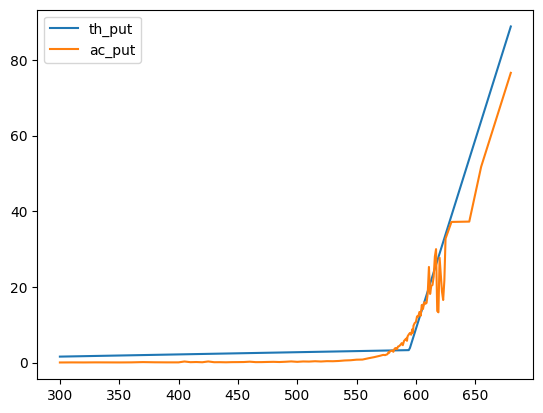

In [32]:
put.plot() #plotting the actual and theoretical option prices